In [16]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [17]:
train_dir = r"E:\Cnn Dataset\Training"
test_dir = r"E:\Cnn Dataset\Testing"


In [32]:
#  preprocessing 
img_size = 224
batch_size = 32
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=15,zoom_range=0.1,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)


In [33]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),batch_size=batch_size,class_mode='categorical',shuffle=True)

Found 2870 images belonging to 4 classes.


In [34]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),batch_size=batch_size,class_mode='categorical',shuffle=False)

Found 394 images belonging to 4 classes.


In [40]:
#  model building
model = Sequential()

In [41]:
#  layer 1 convolution + pooling 
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

In [42]:
#  layer 2 deeper convolution
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

In [43]:
#  layer 3 more deeper 
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))

In [44]:
# layer 4 flatten layer 
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

In [46]:
#   model compilation
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [47]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 222, 222, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 109, 109, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 52, 52, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,246,596 (84.86 MB)

 Trainable params: 22,246,148 (84.86 MB)

 Non-trainable params: 448 (1.75 KB)

In [48]:
epochs = 20

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator
)


Epoch 1/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 488s 5s/step - accuracy: 0.5749 - loss: 1.7250 - val_accuracy: 0.2081 - val_loss: 7.1151
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 450s 5s/step - accuracy: 0.6620 - loss: 0.8238 - val_accuracy: 0.1980 - val_loss: 10.4181
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 469s 5s/step - accuracy: 0.6725 - loss: 0.7798 - val_accuracy: 0.3198 - val_loss: 6.0384
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 432s 5s/step - accuracy: 0.7000 - loss: 0.7180 - val_accuracy: 0.4365 - val_loss: 2.6630
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 429s 5s/step - accuracy: 0.7199 - loss: 0.6729 - val_accuracy: 0.4670 - val_loss: 2.0234
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 428s 5s/step - accuracy: 0.7331 - loss: 0.6317 - val_accuracy: 0.5279 - val_loss: 2.0717
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 426s 5s/step - accuracy: 0.7429 - loss: 0.6269 - val_accuracy: 0.5584 - val_loss: 2.4542
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 340s 4s/step - accuracy: 0.7669 - loss: 0.5528 - val_accuracy: 0.6193 - 

In [49]:
loss, accuracy = model.evaluate(test_generator)
print("Test Accuracy:", accuracy)

13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 632ms/step - accuracy: 0.6574 - loss: 4.8873 
Test Accuracy: 0.6573604345321655


In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [51]:
prediction = model.predict(test_generator)

13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 641ms/step


In [53]:
y_pred = np.argmax(prediction, axis=1)
y_true = test_generator.classes

In [54]:
class_labels = list(test_generator.class_indices.keys())

In [55]:
cm = confusion_matrix(y_true, y_pred)

In [64]:
cm

array([[ 17,  14,  61,   8],
       [  4,  72,  33,   6],
       [  0,   2, 103,   0],
       [  0,   7,   0,  67]])

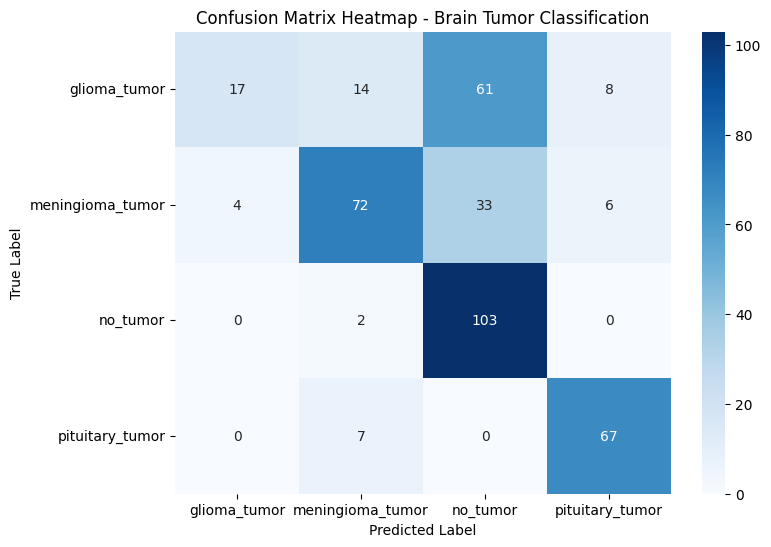

In [61]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_labels,
    yticklabels=class_labels
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap - Brain Tumor Classification")
plt.show()
